In [1]:
# Loading the libraries
from datetime import datetime
import warnings
import numpy as np
import pandas as pd
import datetime as ds
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_excel('South_Africa.xlsx', sheet_name=2, skiprows=1)
dataset = dataset[['Month', 'Production']]
dataset.head()
dataset['Month'] = pd.to_datetime(dataset['Month']) #, infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head(5)

,Production
Month,
2009-01-01,0.000
2009-02-01,0.000
2009-03-01,0.000
2009-04-01,299.375
2009-05-01,299.375


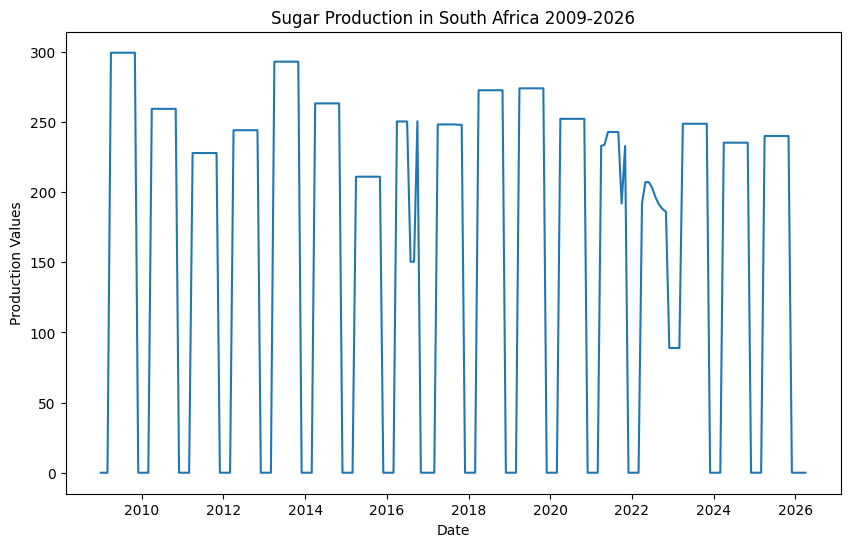

In [9]:
plt.plot(indexedDataset)
plt.ylabel('Production Values')
plt.xlabel('Date')
plt.title('Sugar Production in South Africa 2009-2026');

In [3]:
# Determining Rolling Mean Statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
rolmean, '\n', rolstd

(            Production
 Month                 
 2009-01-01         NaN
 2009-02-01         NaN
 2009-03-01         NaN
 2009-04-01         NaN
 2009-05-01         NaN
 ...                ...
 2025-12-01       160.0
 2026-01-01       160.0
 2026-02-01       160.0
 2026-03-01       160.0
 2026-04-01       140.0
 
 [208 rows x 1 columns],
 '\n',
             Production
 Month                 
 2009-01-01         NaN
 2009-02-01         NaN
 2009-03-01         NaN
 2009-04-01         NaN
 2009-05-01         NaN
 ...                ...
 2025-12-01  118.167831
 2026-01-01  118.167831
 2026-02-01  118.167831
 2026-03-01  118.167831
 2026-04-01  123.582876
 
 [208 rows x 1 columns])

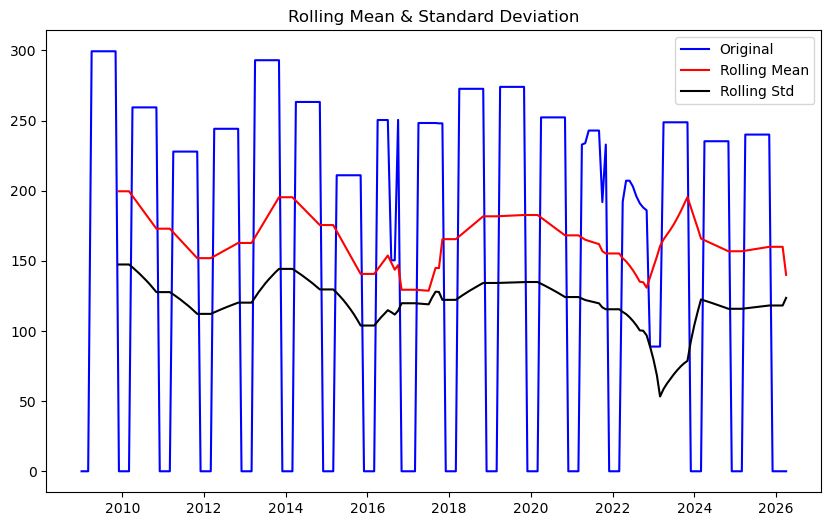

In [4]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
# Perform Dickey-Fuller Test
print("Results of Dickey-Fuller Test")
dftest = adfuller(indexedDataset['Production'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Results of Dickey-Fuller Test
Test Statistics                 -2.819690
p-value                          0.055516
#Lags Used                      13.000000
Number of Observations Used    194.000000
Critical Value (1%)             -3.464515
Critical Value (5%)             -2.876556
Critical Value (10%)            -2.574775
dtype: float64


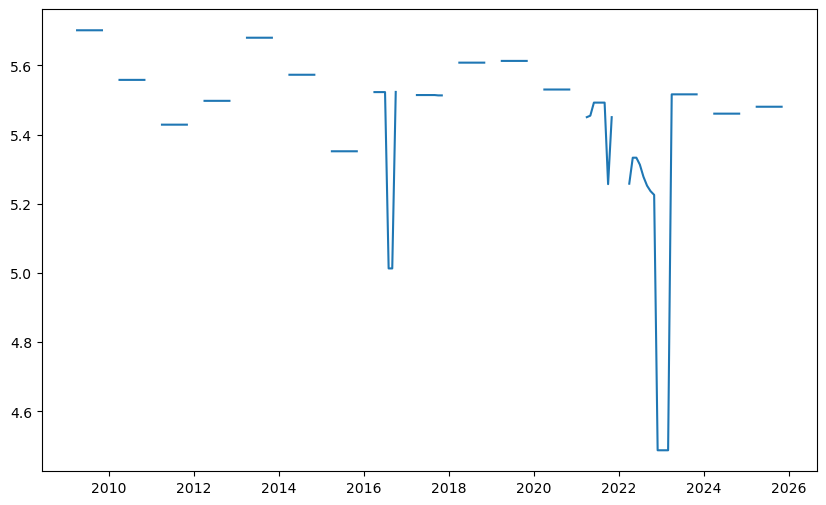

In [7]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale);

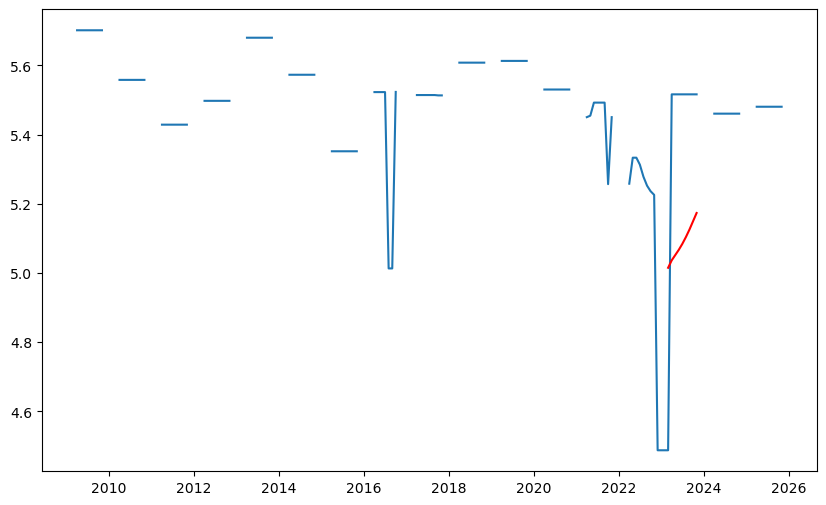

In [10]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red');

In [12]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

,Production
Month,
2009-01-01,NaN
2009-02-01,NaN
2009-03-01,NaN
2009-04-01,NaN
2009-05-01,NaN
2009-06-01,NaN
2009-07-01,NaN
2009-08-01,NaN
2009-09-01,NaN


In [15]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()
datasetLogScaleMinusMovingAverage.shape

(9, 1)

In [ ]:
def test_stationarity(timeseries):

    # Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Production'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value

    print(dfoutput)

In [ ]:
dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)